# Case Study on Regression



In [46]:
#IMPORT LIBRARIES AND PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA COLLECTION AND PROCESSING**

In [48]:
#LOAD THE DATASET FROM CSV FILE TO PANDAS DATAFRAME-
car_df=pd.read_csv(r"D:\DSA\car_age_price.csv")
car_df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [49]:
#INSPECTING TOP 5 ROWS OF THE DATAFRAME
car_df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [50]:
#SHAPE OF THE DATASET
car_df.shape

(112, 2)

In [51]:
#GETTING INFORMATION ABOUT THE DATASET
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


No categorical data in this dataset.If there is any categorical data in the dataset,convert(encode)it into numerical data.

In [52]:
#CHECKING THE NUMBER OF MISSING VALUES
car_df.isnull().sum()

Year     0
Price    0
dtype: int64

No missing values in this dataset.

In [53]:
#CHECKING DESCRIPTION OF THE DATASET
car_df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [54]:
#CHECKING UNIQUE VALUES IN THE DATASET
car_df['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [55]:
#NO.OF UNIQUE VALUES
car_df['Price'].nunique()

35

<AxesSubplot:>

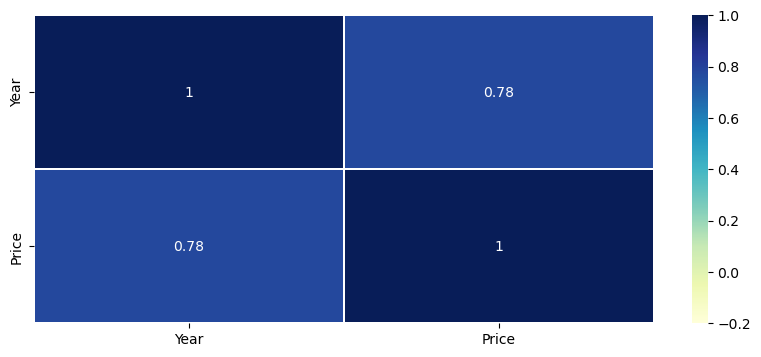

In [56]:
#PLOTTING HEATMAP TO CHECK CORRELATION 
corrmatrix=car_df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,linewidth=0.3,cmap='YlGnBu')

**SPLITTING THE DATA AND TARGET**

In [14]:
x=car_df.drop(['Price'],axis=1)
y=car_df['Price']
print(x)
print(y)

     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns]
0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


**SPLITTING TRAINING AND TEST DATA**

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

**MODEL TRAINING AND EVALUATION**

**1. Linear Regression**

In [27]:
#LOADING THE LINEAR REGRESSION MODEL
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [28]:
model=lr.fit(x_train,y_train)

In [29]:
#PREDICTION ON TEST DATA
y_pred=model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R2 is:',r2_score(y_test,y_pred))

MSE is: 3878764025.5442586
R2 is: 0.43479661865476726


PREDICTION

In [44]:
#PREDICT THE PRICE OF A 2022 MODEL SECOND HAND Grand i10 car 
x_2022=pd.DataFrame([2022])
y_lr=model.predict(x_2022)
print('Predicted price of second hand grand i10 car is :',y_lr)

Predicted price of second hand grand i10 car is : [740160.11937766]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**2. Lasso Regression**

In [33]:
#LOADING THE LASSO REGRESSION MODEL
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
model1=lasso.fit(x_train,y_train)

In [34]:
y_pred=lasso.predict(x_test)
lasso.fit(x_train,y_train)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R2 is:',r2_score(y_test,y_pred))

MSE is: 3878764025.5442586
R2 is: 0.43479661865476726


PREDICTION

In [45]:
#PREDICT THE PRICE OF A 2022 MODEL SECOND HAND Grand i10 car 
x_lass=[2022]
y_lass=lasso.predict([x_lass])
print('Predicted price of second hand grand i10 car is :',y_lass)

Predicted price of second hand grand i10 car is : [740159.90314002]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


**CONCLUSION**

LASSO(Least Absolute Shrinkage and Selection Operator)regression is performing slightly better than linear regression.